# Medical Insurance and cost prediction

In this project I will be using linear regression model to predict Medical insurance cost
* Data is taken from kaggle [Medical personal data](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download)

Importing dependecies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


### Data collection and analysis

In [2]:
# loading csv datafile to pandas DataFrame
insurance_df = pd.read_csv(r"C:\Users\ASUS\Desktop\machine learning and dl\projects\medical insurance and cost prediction\dataset\insurance.csv")

In [3]:
# first five row of df
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_backup = insurance_df

In [5]:
# number of rows and columns
insurance_df.shape

(1338, 7)

In [6]:
# information about dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In this dataset categorical features are:  
* sex
* smoker
* region

In [7]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are  no null values in data

### Data analysis

In [8]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24624\1101081059.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['age'])


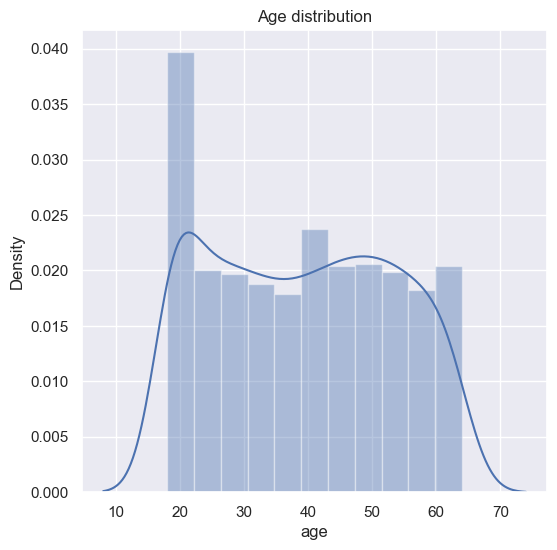

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['age'])
plt.title('Age distribution')
plt.show()

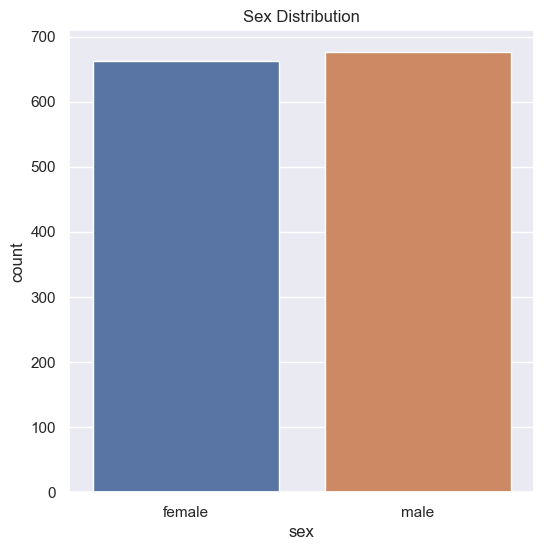

In [10]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_df)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24624\3936866370.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['bmi'])


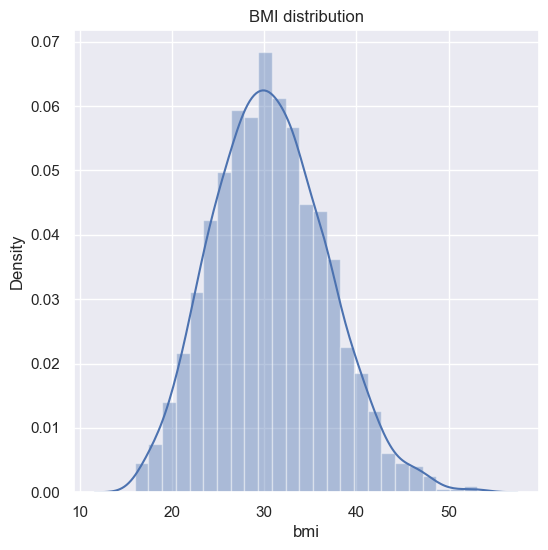

In [12]:
# Bmi distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['bmi'])
plt.title('BMI distribution')
plt.show()

Normal BMI range --> 18.5 to 24.9


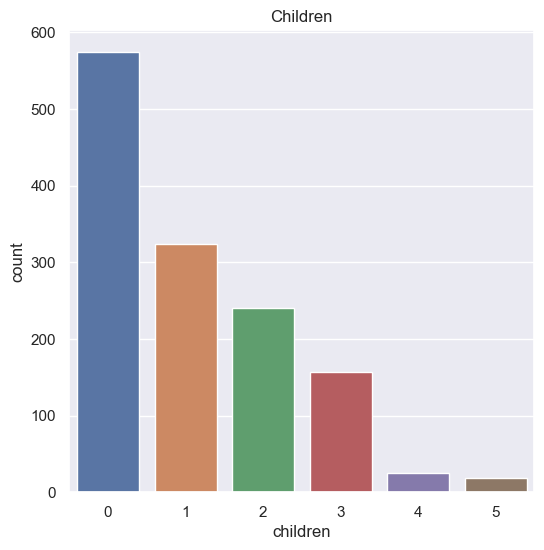

In [13]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_df)
plt.title('Children')
plt.show()

In [14]:
 insurance_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

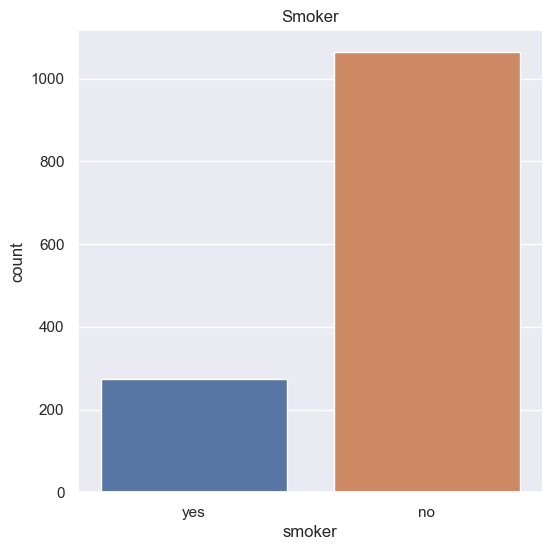

In [15]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_df)
plt.title('Smoker')
plt.show()

In [16]:
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

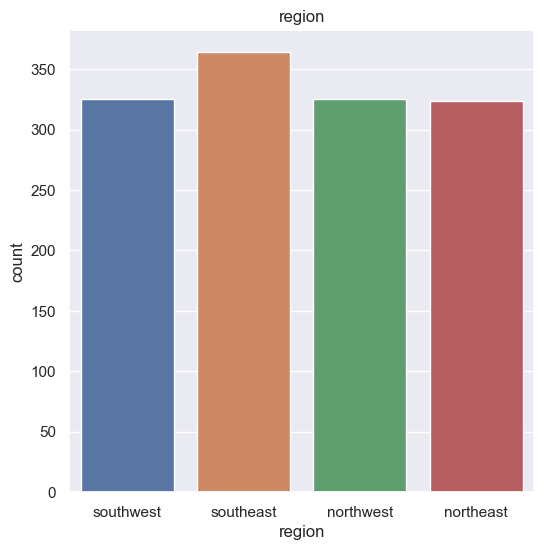

In [17]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_df)
plt.title('region')
plt.show()

In [18]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24624\1719185637.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['charges'])


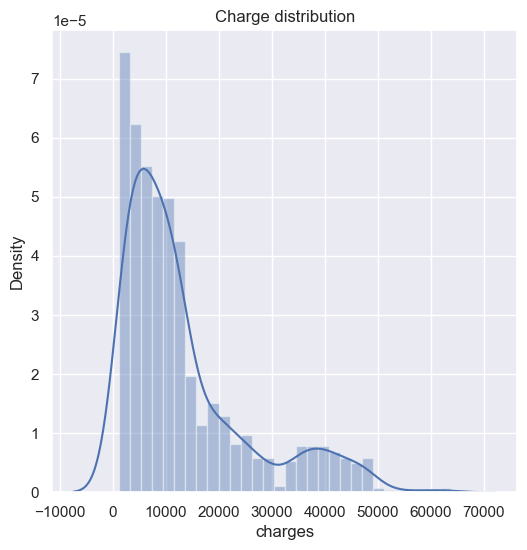

In [19]:
# distribution of charge value

plt.figure(figsize=(6,6))
sns.distplot(insurance_df['charges'])
plt.title('Charge distribution')
plt.show()

## Data preprocessiong

Encoding the categorical features

In [20]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


here sex,smoker,region are categorical data so we need to encode them to numericald data

In [21]:
# encoding sex column
insurance_df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [22]:
# encoding smoker column
insurance_df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding region column
insurance_df.replace({'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}}, inplace=True)

Splitting the Features and Target

In [23]:
X = insurance_df.drop(columns='charges', axis=1) # features
Y = insurance_df['charges']  # target

In [24]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [25]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & testing data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [28]:
# loading the linear Regression model
regressor = LinearRegression()

In [29]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation


In [30]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [31]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R square value : ',r2_train)

R square value :  0.7519923667088932


In [32]:
# prediction on testing data
test_data_prediction = regressor.predict(X_test)


In [33]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ',r2_test)

R squared value :  0.7445422986536503


Building a Predictive system


In [34]:
# input_data = (age,sex,bmi,children,smoker,region)
# sex: male = 0 , female = 1
# smoker: yes=0, no=1
# region: southwest=0, southeast=1, northwest=2, northeast=3

input_data = (45,0,25,0,0,1)

# converting input tuple data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#predicting 
prediction = regressor.predict(input_data_reshaped)
print(f'The insurance cost is USD {prediction[0]}')

The insurance cost is USD 31056.35267131327


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
